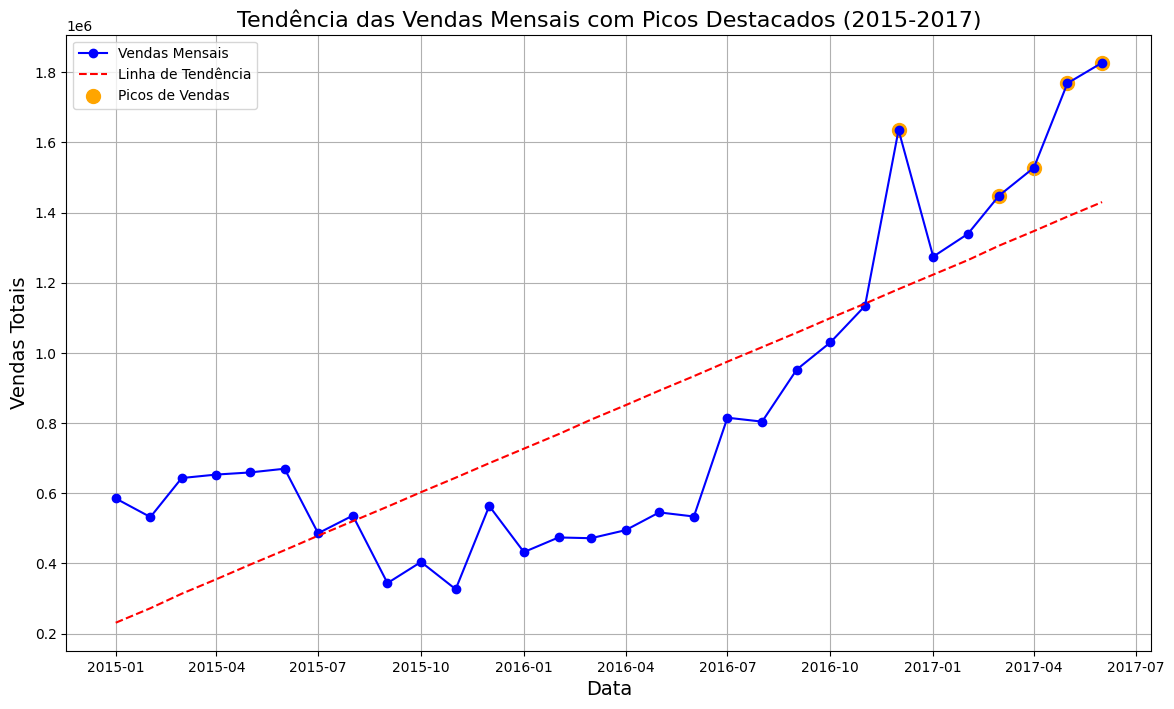

In [5]:
#VISUALIZAÇÃO 1

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


vendas2015= pd.read_csv('AdventureWorks_Sales_2015.csv')
vendas2016= pd.read_csv('AdventureWorks_Sales_2016.csv')
vendas2017= pd.read_csv('AdventureWorks_Sales_2017.csv')
produtos = pd.read_csv('AdventureWorks_Products.csv')

vendas = pd.concat([vendas2015, vendas2016, vendas2017])

vendas['OrderDate'] = pd.to_datetime(vendas['OrderDate'])

vendas_com_produtos = vendas.merge(produtos, left_on='ProductKey', right_on='ProductKey')

vendas_com_produtos['TotalSales'] = vendas_com_produtos['OrderQuantity'] * vendas_com_produtos['ProductPrice']

vendas_mensais = vendas_com_produtos.groupby(vendas_com_produtos['OrderDate'].dt.to_period('M'))['TotalSales'].sum()

vendas_mensais = vendas_mensais.reset_index()
vendas_mensais['OrderDate'] = vendas_mensais['OrderDate'].dt.to_timestamp()

z = np.polyfit(vendas_mensais.index, vendas_mensais['TotalSales'], 1)
p = np.poly1d(z)
vendas_mensais['Trend'] = p(vendas_mensais.index)

peaks = vendas_mensais.nlargest(5, 'TotalSales')

plt.figure(figsize=(14, 8))
plt.plot(vendas_mensais['OrderDate'], vendas_mensais['TotalSales'], label='Vendas Mensais', color='blue', marker='o')
plt.plot(vendas_mensais['OrderDate'], vendas_mensais['Trend'], label='Linha de Tendência', linestyle='--', color='red')

plt.scatter(peaks['OrderDate'], peaks['TotalSales'], color='orange', s=100, label='Picos de Vendas')

plt.title('Tendência das Vendas Mensais com Picos Destacados (2015-2017)', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vendas Totais', fontsize=14)
plt.legend()
plt.grid(True)




C:\Users\netoz\AppData\Local\Temp\ipykernel_7076\35623296.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_bicicletas['Profit'] = (vendas_bicicletas['ProductPrice'] - vendas_bicicletas['ProductCost']) * vendas_bicicletas['OrderQuantity']


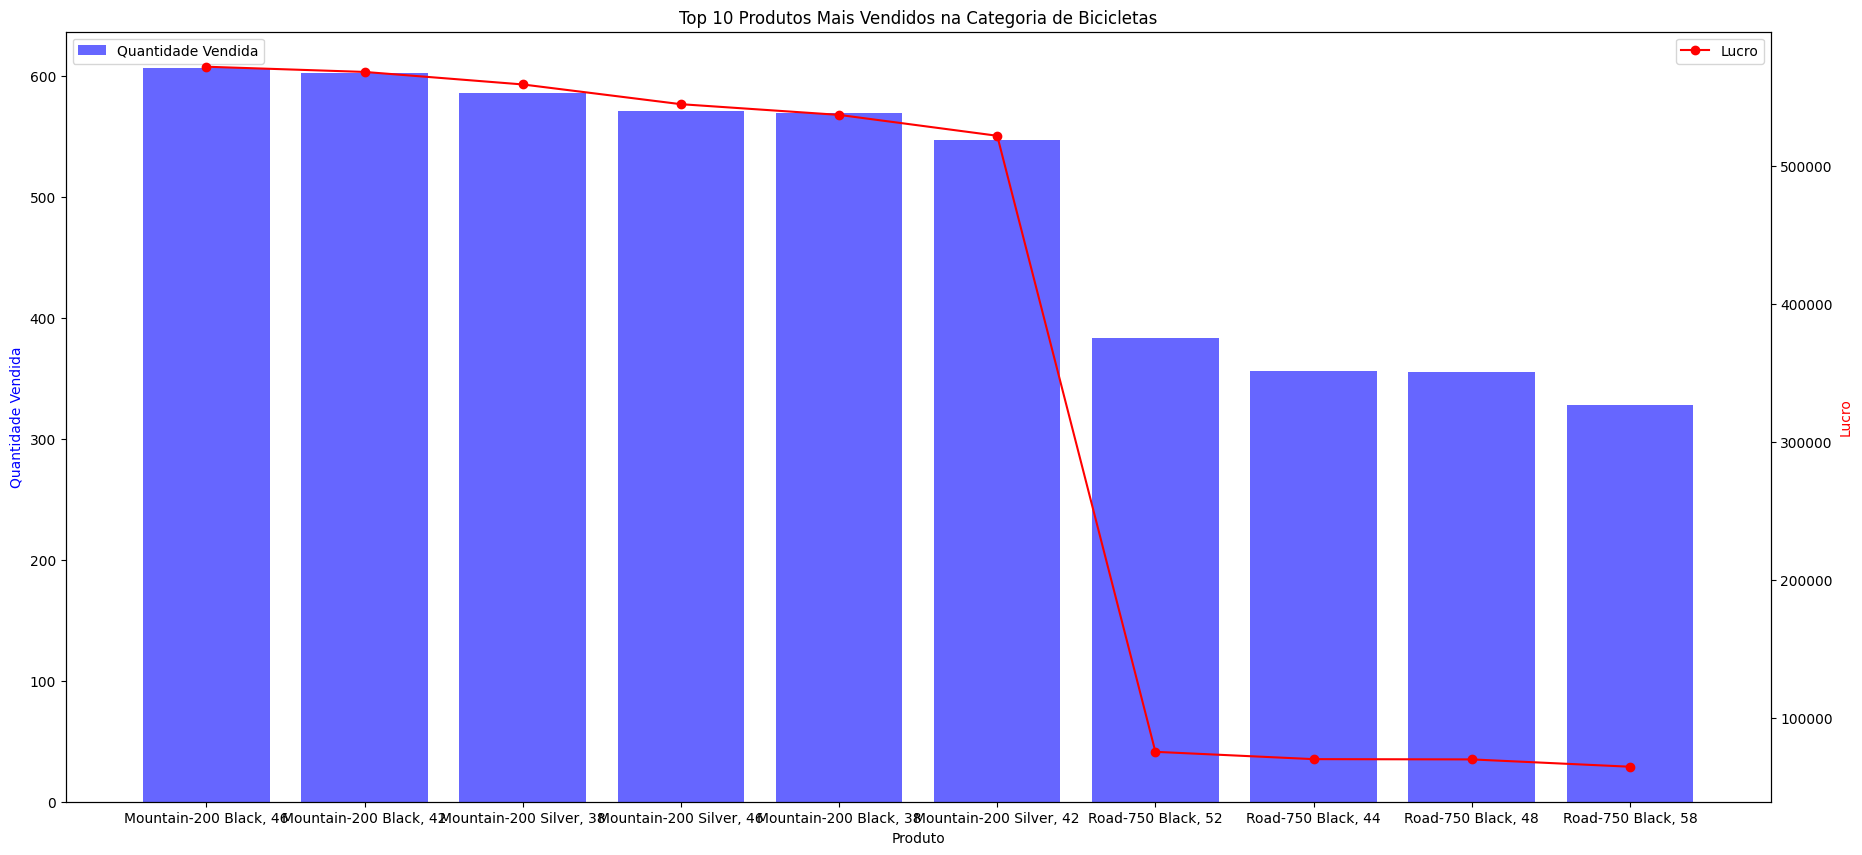

In [42]:
#VISUALIZAÇÃO 2

import matplotlib.pyplot as plt
import pandas as pd

vendas2015 = pd.read_csv('AdventureWorks_Sales_2015.csv')
vendas2016 = pd.read_csv('AdventureWorks_Sales_2016.csv')
vendas2017 = pd.read_csv('AdventureWorks_Sales_2017.csv')
produtos = pd.read_csv('AdventureWorks_Products.csv')
subcategorias = pd.read_csv('AdventureWorks_Product_Subcategories.csv')
categorias = pd.read_csv('AdventureWorks_Product_Categories.csv')

vendas = pd.concat([vendas2015, vendas2016, vendas2017])

vendas = vendas.merge(produtos, on='ProductKey')

vendas = vendas.merge(subcategorias, on='ProductSubcategoryKey')

vendas = vendas.merge(categorias, on='ProductCategoryKey')

vendas_bicicletas = vendas[vendas['CategoryName'] == 'Bikes']

vendas_bicicletas['Profit'] = (vendas_bicicletas['ProductPrice'] - vendas_bicicletas['ProductCost']) * vendas_bicicletas['OrderQuantity']

agrupado = vendas_bicicletas.groupby('ProductName').agg({
    'OrderQuantity': 'sum',
    'Profit': 'sum'
}).reset_index()

top10_produtos = agrupado.sort_values(by='OrderQuantity', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(22, 10))

ax1.bar(top10_produtos['ProductName'], top10_produtos['OrderQuantity'], color='b', alpha=0.6, label='Quantidade Vendida')

ax2 = ax1.twinx()
ax2.plot(top10_produtos['ProductName'], top10_produtos['Profit'], color='r', marker='o', label='Lucro')

ax1.set_xlabel('Produto')
ax1.set_ylabel('Quantidade Vendida', color='b')
ax2.set_ylabel('Lucro', color='r')
plt.title('Top 10 Produtos Mais Vendidos na Categoria de Bicicletas')

plt.xticks(rotation=45, ha='right')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')





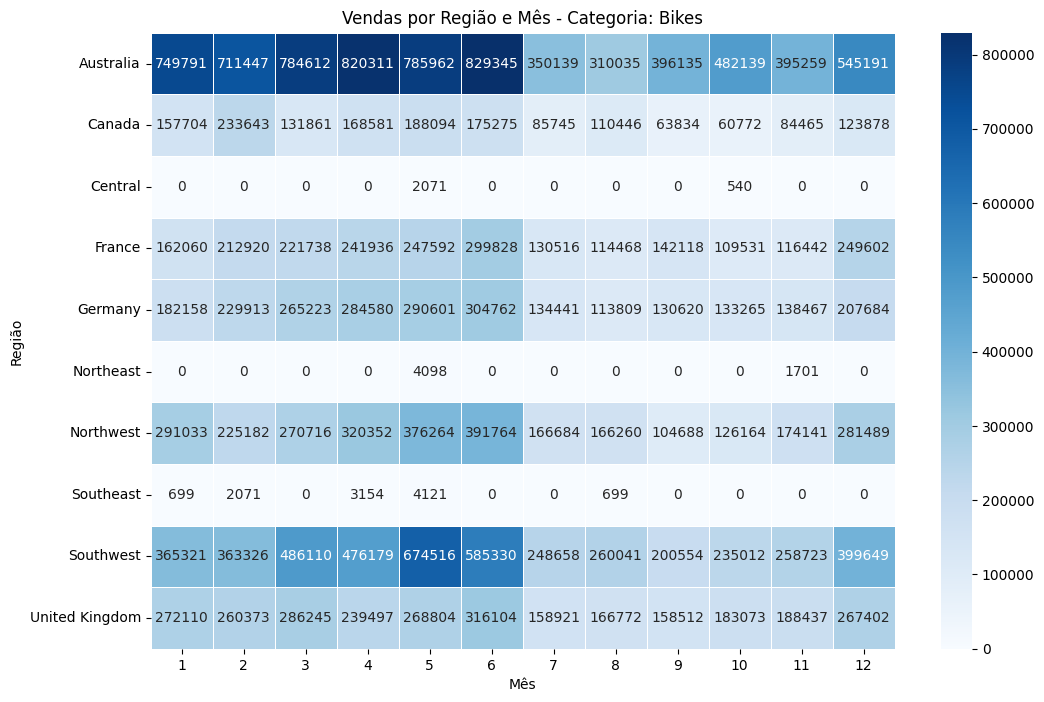

In [23]:
#VISUALIZAÇÃO 3


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

vendas2015 = pd.read_csv('AdventureWorks_Sales_2015.csv')
vendas2016 = pd.read_csv('AdventureWorks_Sales_2016.csv')
vendas2017 = pd.read_csv('AdventureWorks_Sales_2017.csv')
produtos = pd.read_csv('AdventureWorks_Products.csv')
subcategorias = pd.read_csv('AdventureWorks_Product_Subcategories.csv')
categorias = pd.read_csv('AdventureWorks_Product_Categories.csv')
regioes = pd.read_csv('AdventureWorks_Territories.csv')

vendas = pd.concat([vendas2015, vendas2016, vendas2017])

vendas = vendas.merge(produtos, on='ProductKey')

vendas = vendas.merge(subcategorias, on='ProductSubcategoryKey')

vendas = vendas.merge(categorias, on='ProductCategoryKey')

vendas = vendas.merge(regioes, left_on='TerritoryKey', right_on='SalesTerritoryKey')

vendas['SalesAmount'] = vendas['OrderQuantity'] * vendas['ProductPrice']

vendas['OrderDate'] = pd.to_datetime(vendas['OrderDate'])
vendas['Month'] = vendas['OrderDate'].dt.month


def criar_mapa_calor(categoria):
    
    vendas_filtradas = vendas[vendas['CategoryName'] == categoria]
    
    pivot_table = vendas_filtradas.pivot_table(
        index='Region',
        columns='Month',
        values='SalesAmount',
        aggfunc='sum',
        fill_value=0
    )

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='Blues', linewidths=.5)
    plt.title(f'Vendas por Região e Mês - Categoria: {categoria}')
    plt.xlabel('Mês')
    plt.ylabel('Região')

criar_mapa_calor('Bikes')



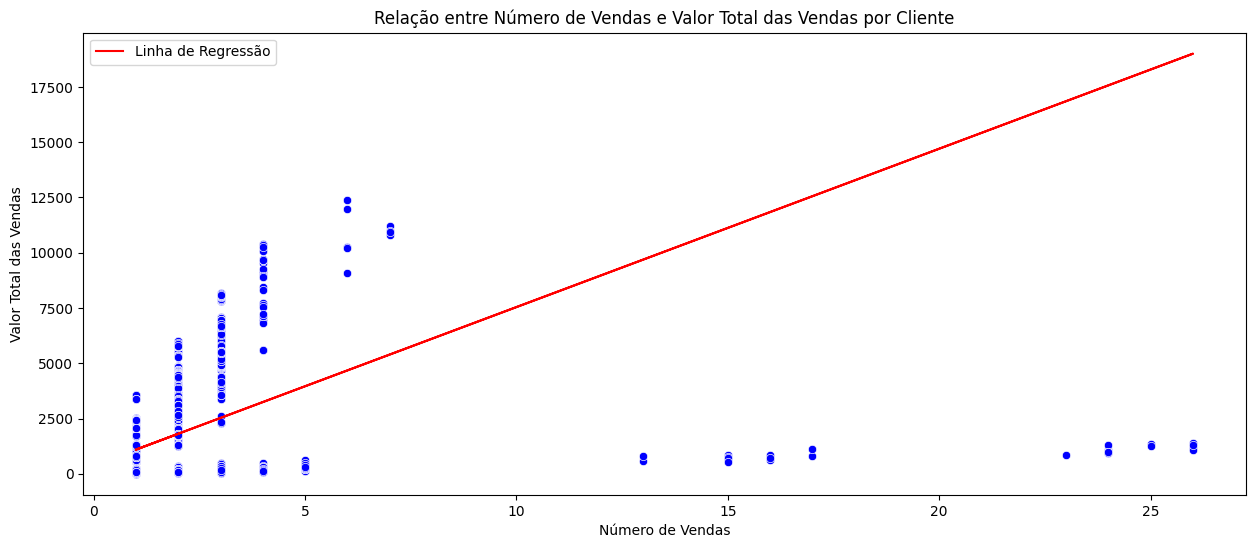

In [3]:
#VISUALIZAÇÃO 4

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

vendas2015 = pd.read_csv('AdventureWorks_Sales_2015.csv')
vendas2016 = pd.read_csv('AdventureWorks_Sales_2016.csv')
vendas2017 = pd.read_csv('AdventureWorks_Sales_2017.csv')
produtos = pd.read_csv('AdventureWorks_Products.csv')

try:
    clientes = pd.read_csv('AdventureWorks_Customers.csv', encoding='utf-8')
except UnicodeDecodeError:
    clientes = pd.read_csv('AdventureWorks_Customers.csv', encoding='ISO-8859-1')


vendas = pd.concat([vendas2015, vendas2016, vendas2017])

vendas = vendas.merge(produtos[['ProductKey', 'ProductPrice']], on='ProductKey')


vendas_por_cliente = vendas.groupby('CustomerKey').agg({
    'OrderNumber': 'nunique',   
    'ProductPrice': 'sum'       
}).reset_index()

vendas_por_cliente.rename(columns={'OrderNumber': 'NumeroVendas', 'ProductPrice': 'ValorTotal'}, inplace=True)

plt.figure(figsize=(15, 6))
sns.scatterplot(x='NumeroVendas', y='ValorTotal', data=vendas_por_cliente, color='b')

coefficients = np.polyfit(vendas_por_cliente['NumeroVendas'], vendas_por_cliente['ValorTotal'], 1)
poly_eq = np.poly1d(coefficients)
y_pred = poly_eq(vendas_por_cliente['NumeroVendas'])


plt.plot(vendas_por_cliente['NumeroVendas'], y_pred, color='r', label='Linha de Regressão')

plt.xlabel('Número de Vendas')
plt.ylabel('Valor Total das Vendas')
plt.title('Relação entre Número de Vendas e Valor Total das Vendas por Cliente')
plt.legend()



Colunas disponíveis em produtos: Index(['ProductKey', 'ProductSubcategoryKey', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize',
       'ProductStyle', 'ProductCost', 'ProductPrice', 'ProductCategoryKey',
       'CategoryName'],
      dtype='object')
Colunas disponíveis em vendas: Index(['OrderDate', 'StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey',
       'TerritoryKey', 'OrderLineItem', 'OrderQuantity'],
      dtype='object')


<Figure size 1400x800 with 0 Axes>

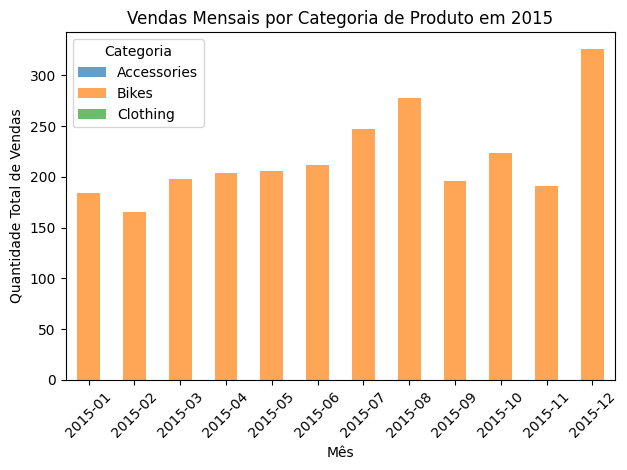

<Figure size 1400x800 with 0 Axes>

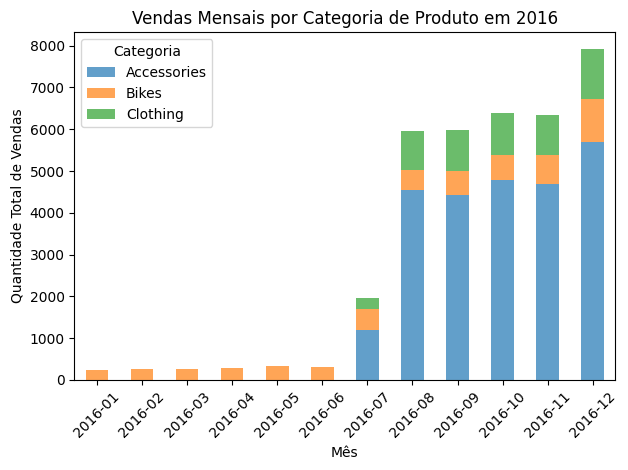

In [6]:
#VISUALIZAÇÃO 5

import pandas as pd
import matplotlib.pyplot as plt

vendas2015 = pd.read_csv('AdventureWorks_Sales_2015.csv')
vendas2016 = pd.read_csv('AdventureWorks_Sales_2016.csv')
vendas2017 = pd.read_csv('AdventureWorks_Sales_2017.csv')
produtos = pd.read_csv('AdventureWorks_Products.csv')
subcategorias = pd.read_csv('AdventureWorks_Product_Subcategories.csv')
categorias = pd.read_csv('AdventureWorks_Product_Categories.csv')

vendas = pd.concat([vendas2015, vendas2016])

produtos = produtos.merge(subcategorias[['ProductSubcategoryKey', 'ProductCategoryKey']], on='ProductSubcategoryKey')
produtos = produtos.merge(categorias[['ProductCategoryKey', 'CategoryName']], on='ProductCategoryKey')

print("Colunas disponíveis em produtos:", produtos.columns)
print("Colunas disponíveis em vendas:", vendas.columns)


vendas = vendas.merge(produtos[['ProductKey', 'CategoryName']], on='ProductKey')

vendas['OrderDate'] = pd.to_datetime(vendas['OrderDate'])
vendas['Month'] = vendas['OrderDate'].dt.to_period('M')
vendas['Year'] = vendas['OrderDate'].dt.year

vendas_ano_categoria = vendas.groupby(['Year', 'Month', 'CategoryName']).agg({
    'OrderQuantity': 'sum'
}).reset_index()

pivot_table = vendas_ano_categoria.pivot_table(
    index='Month',
    columns=['CategoryName'],
    values='OrderQuantity',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(14, 8))

pivot_table_2015 = pivot_table.loc[pivot_table.index.get_level_values('Month').year == 2015]
pivot_table_2015.plot(kind='bar', stacked=True, alpha=0.7)

plt.xlabel('Mês')
plt.ylabel('Quantidade Total de Vendas')
plt.title('Vendas Mensais por Categoria de Produto em 2015')
plt.legend(title='Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 8))

pivot_table_2016 = pivot_table.loc[pivot_table.index.get_level_values('Month').year == 2016]
pivot_table_2016.plot(kind='bar', stacked=True, alpha=0.7)

plt.xlabel('Mês')
plt.ylabel('Quantidade Total de Vendas')
plt.title('Vendas Mensais por Categoria de Produto em 2016')
plt.legend(title='Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



